In [270]:
import numpy as np
np.seterr(all='raise')

import pint
si = pint.UnitRegistry()

In [271]:
from matplotlib import pyplot
si.setup_matplotlib()

In [272]:
%run mpdata.ipynb

In [273]:
%run coord.ipynb

In [274]:
%run phys.ipynb
ph = phys(si)

In [388]:
def plot_init():
    pyplot.figure(figsize=(15,9))
    #pyplot.yscale('log')

def plot_done(title):
    pyplot.title(title)
    pyplot.grid()
    pyplot.legend()
    pyplot.show()
    
def plot_pdfr(r_min, r_max, cdf):
    cdfarg = np.linspace(r_min.magnitude, r_max.magnitude, 1000) * r_min.units
    x = cdfarg[0:-1] + (cdfarg[1:] - cdfarg[0:-1])/2
    y = np.diff(ph.mgn(cdf(cdfarg))) / np.diff(ph.mgn(cdfarg))
    pyplot.plot(x, y)
    
def plot_step(r, pdf, t):
    pyplot.step(r, pdf, linestyle='-', where='mid', label=str(t))

In [393]:
nr = 32
nt = 512
dt = .01 * si.second
r_min = 25 * si.micrometre
r_max = 100 * si.micrometre
r_mid = r_min + .4*(r_max - r_min) 
cdf0 = lambda r: np.arctan((r-r_mid)/(2*si.micrometre)) / 1e6 # Witch of Agnesi
A = .1e-7 * si.micrometre / si.second
drdt = lambda r: A/r**2

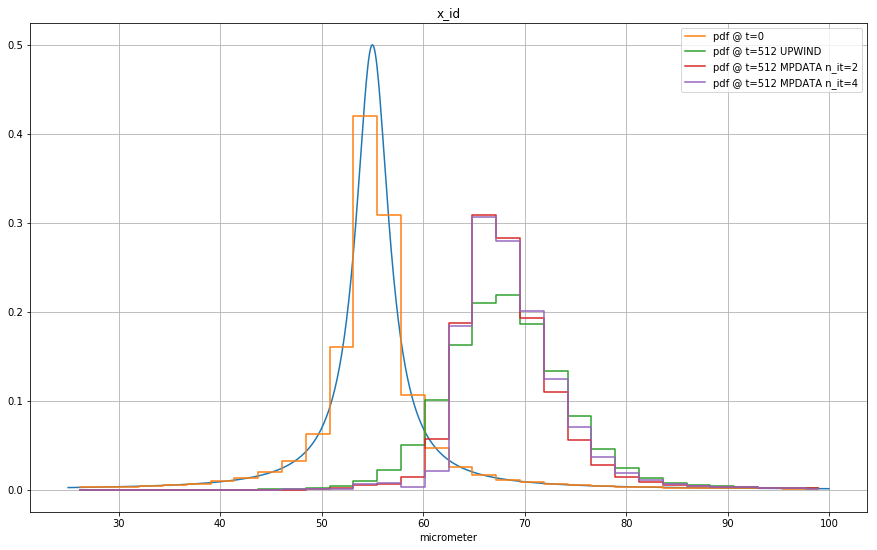

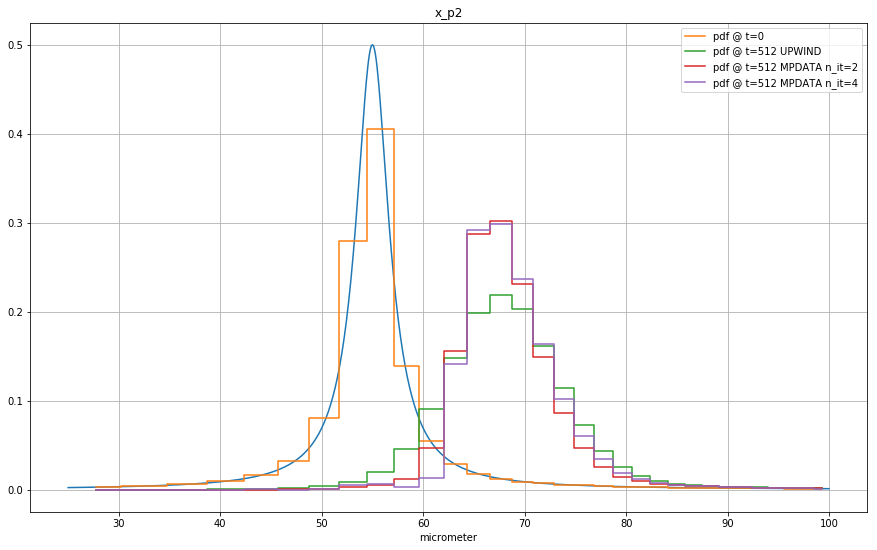

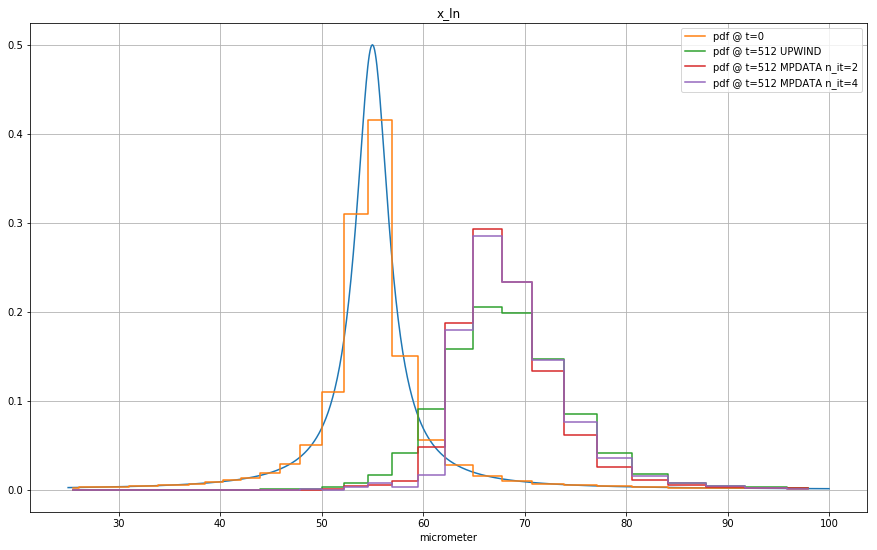

In [394]:
for fn in (x_id, x_p2, x_ln): 
    plot_init()
    
    algos = (
        MPDATA(nr, r_min, r_max, dt, cdf0, fn(si), {"label":"UPWIND",               "n_it":1}),
        MPDATA(nr, r_min, r_max, dt, cdf0, fn(si), {"label":"MPDATA n_it=2",        "n_it":2, "dfl":False}),
        MPDATA(nr, r_min, r_max, dt, cdf0, fn(si), {"label":"MPDATA n_it=4",        "n_it":4, "dfl":False}),
        #MPDATA(nr, r_min, r_max, dt, cdf0, fn(si), {"label":"MPDATA n_it=2 + dfl",  "n_it":2, "dfl":True})
    )

    plot_pdfr(r_min, r_max, cdf0)

    plot_step(algos[0].r, algos[0].pdf, "pdf @ t=0")

    for algo in algos:
        for t in range(nt): 
            algo.step(drdt)

    for algo in algos:
        plot_step(algo.r, algo.pdf, "pdf @ t=" + str(nt) + " " + algo.opts["label"])
    plot_done(fn.__name__)